In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import numpy as np
import scipy.io as io
import meshio
from scipy import interpolate

# Load the mesh and calclate the tetrahedra _(cells)_ centroids

$$\Bigg[\dfrac{x_1 + x_2 + x_3 + x_4}{4}, \dfrac{y_1 + y_2 + y_3 + y_4}{4}, \dfrac{z_1 + z_2 + z_3 + z_4}{4}\bigg]$$

In [388]:
#sim_results = meshio.read('../Scripts/FEM/msh.vtk') # Import the simulation results file

pnt_select = np.where(np.logical_and(sim_results.cell_data['mat_id'][0] >= 3, sim_results.cell_data['mat_id'][0] < 4))[0]
max_modulation = sim_results.cell_data['max_modulation'][0][pnt_select]


# Calculate the tetrahedra centroids
point_ids = sim_results.cells[0][1].flatten() # Flaten the index array
ordered_points = sim_results.points[point_ids, :].reshape((int(point_ids.shape[0]/4), 4, 3)) # Reorder the points and split them in groups of 4
ordered_points = ordered_points[pnt_select, :, :]
cell_centroids = .25*np.sum(ordered_points, axis=1) # Calculate the centroids of the points

In [366]:
ordered_points.shape

(242820, 4, 3)

In [459]:
wh = np.where(np.round(cell_centroids[:, 2], 0) == 0)[0]
#wh = np.where(np.logical_or(np.round(cell_centroids[:, 2], 0) == 42, np.round(cell_centroids[:, 2], 0) == 43))[0]

'''
wh = np.hstack((np.where(np.round(cell_centroids[:, 2], 0) == -6)[0], np.where(np.round(cell_centroids[:, 2], 0) == -5)[0], 
                np.where(np.round(cell_centroids[:, 2], 0) == -4)[0], np.where(np.round(cell_centroids[:, 2], 0) == -3)[0], 
                np.where(np.round(cell_centroids[:, 2], 0) == -2)[0], np.where(np.round(cell_centroids[:, 2], 0) == -1)[0], 
                np.where(np.round(cell_centroids[:, 2], 0) == 0)[0], np.where(np.round(cell_centroids[:, 2], 0) == 1)[0], 
                np.where(np.round(cell_centroids[:, 2], 0) == 2)[0], np.where(np.round(cell_centroids[:, 2], 0) == 3)[0], 
                np.where(np.round(cell_centroids[:, 2], 0) == 4)[0]))
'''

#np.sort(np.round(cell_centroids[:, 2], 3))[339083]
c_cent = cell_centroids[wh, 0:2]
#np.amax(c_cent[:, 1])

In [25]:
np.unique(cell_centroids[:, 2]).shape

(706948,)

In [355]:
ordered_points.shape

(709296, 4, 3)

In [253]:
np.unique(np.round(cell_centroids[:, 2], 0))

array([-86., -85., -84., -83., -82., -81., -80., -79., -78., -77., -76.,
       -75., -74., -73., -72., -71., -70., -69., -68., -67., -66., -65.,
       -64., -63., -62., -61., -60., -59., -58., -57., -56., -55., -54.,
       -53., -52., -51., -50., -49., -48., -47., -46., -45., -44., -43.,
       -42., -41., -40., -39., -38., -37., -36., -35., -34., -33., -32.,
       -31., -30., -29., -28., -27., -26., -25., -24., -23., -22., -21.,
       -20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,  -0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  6

In [368]:
max_modulation[wh].shape

(3838,)

In [139]:
np.sqrt(c_cent.shape[0])

61.18823416311342

In [42]:
np.where(cell_centroids[:, 2] == 0.00015509930379792314)

(array([562800], dtype=int64),)

In [130]:
cell_centroids

array([[-54.42167968, -13.66873651,  50.3547144 ],
       [-46.89145   , -65.953875  , -19.248475  ],
       [-31.58306102, -62.92389843, -14.85472651],
       ...,
       [-56.45011901,   7.58397214,  46.69365217],
       [ 70.99541603,  49.1775564 ,   3.74774281],
       [ 71.00982104,  49.17024367,   3.76972223]])

In [351]:
c_cent

array([[-54.42167968, -13.66873651],
       [-54.42167968, -13.66873651],
       [-54.42167968, -13.66873651],
       ...,
       [-54.42167968, -13.66873651],
       [-54.42167968, -13.66873651],
       [-54.42167968, -13.66873651]])

In [208]:
max_modulation[wh].reshape((72, -1)).shape

(72, 52)

In [271]:
#max_modulation[wh].reshape((11, -1)).shape
max_modulation[wh[:-1]].shape

(105082,)

In [213]:
np.amax(max_modulation[wh])

2.395321594076182

In [297]:
imd = np.hstack((c_cent[:, 0], c_cent[:, 1]))
np.array([c_cent[:, 0], c_cent[:, 1]]).shape
#imd.reshape((int(imd.shape[0]/2), -1)).shape
np.empty((c_cent.shape[0], c_cent.shape[0]), dtype=np.float32)

MemoryError: Unable to allocate 41.1 GiB for an array with shape (105083, 105083) and data type float32

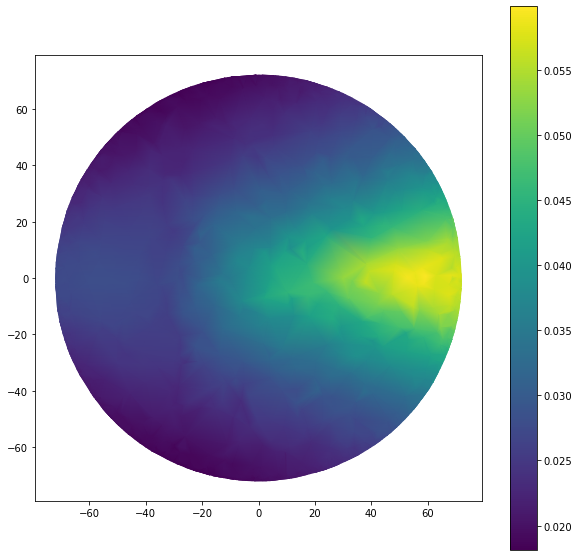

In [460]:
#z_index = 76 # Z-slice index

# Create the figure holders
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1)

# Plot the images and add titles
#ax1.imshow(c_cent, interpolation="spline36", cmap='viridis', aspect='auto')
#ax1.set_title('Maximum modulation envelope')

#ax1.scatter(c_cent[:, 0], c_cent[:, 1], s=1, c=np.where(max_modulation[wh] <= 0.07, max_modulation[wh], 0))
#ax1.hexbin(c_cent[:, 0], c_cent[:, 1], np.where(max_modulation[wh] <= 0.07, max_modulation[wh], 0))
#ax1.tripcolor(c_cent[:, 0], c_cent[:, 1], mask=np.where(max_modulation[wh] <= 0.07, max_modulation[wh], 0))

import matplotlib.tri as tri
triang = tri.Triangulation(c_cent[:, 0], c_cent[:, 1])
#triang = tri.Triangulation(axis_1_interp, axis_2_interp)

ax1.set_aspect('equal')
#tpc = ax1.tripcolor(triang, np.where(max_modulation[wh] <= 10, max_modulation[wh], 0), shading='flat')
tpc = ax1.tripcolor(triang, max_modulation[wh], shading='gouraud')
fig.colorbar(tpc)
#tpc = ax1.tripcolor(triang, data_points_u[:,0], shading='gouraud')

plt.show() # Show the plots

In [480]:
#np.argsort(c_cent[:, 0])

pts = np.meshgrid(max_modulation[wh][np.argsort(c_cent[:, 0])], max_modulation[wh][np.argsort(c_cent[:, 1])])

In [475]:
pts[0].shape

(1485, 1485)

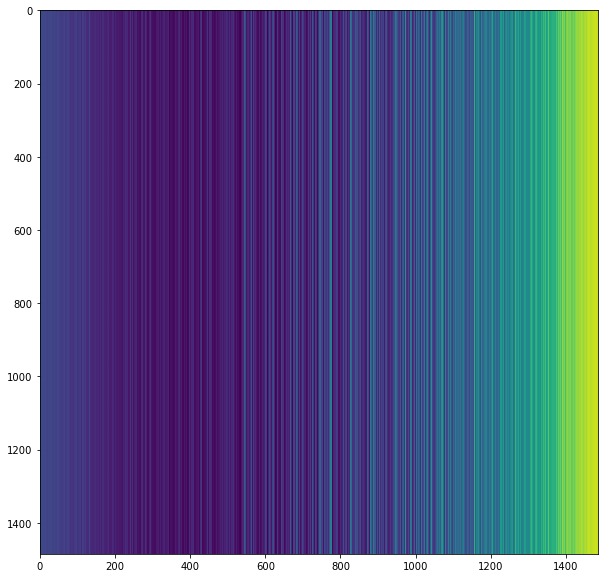

In [481]:
#z_index = 76 # Z-slice index

# Create the figure holders
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1)

# Plot the images and add titles
ax1.imshow(pts[0], interpolation="spline36", cmap='viridis', aspect='auto')
#ax1.set_title('Maximum modulation envelope')

plt.show() # Show the plots

In [405]:
#np.(np.diff(np.sort(c_cent[:, 0])))

#axis_1_step = np.uint32(np.ceil(1. + (c_cent[-1, 0] - c_cent[0, 0])/np.amin(np.diff(c_cent[:, 0]))))
#axis_1_step

axis_1_interp = np.linspace(c_cent[0, 0], c_cent[-1, 0], 2*c_cent[:, 0].shape[0])
axis_2_interp = np.linspace(c_cent[0, 1], c_cent[-1, 1], 2*c_cent[:, 1].shape[0])

In [407]:
#axis_2_interp.shape
#c_cent[:, 0].shape

(1485,)

In [437]:
axis_1 = c_cent[:, 0]
axis_2 = c_cent[:, 1]

axis_1_interp = np.linspace(c_cent[0, 0], c_cent[-1, 0], c_cent[:, 0].shape[0])
axis_2_interp = np.linspace(c_cent[0, 1], c_cent[-1, 1], c_cent[:, 1].shape[0])

gr = np.meshgrid(max_modulation[wh])

data_points_u = interpolate.interp2d(axis_1, axis_2, gr, kind='linear')
data_points_u = data_points_u(axis_1_interp, axis_2_interp)

In [444]:
data_points_u[:,0].shape

array([ 7.9011291 ,  7.89500158,  7.88887406, ..., -1.17985819,
       -1.18598571, -1.19211323])

In [466]:
tpc.get_array()

array([0.02011395, 0.03954464, 0.02510643, ..., 0.03602829, 0.03457065,
       0.03389932])